# PA 2: Classification - Decision Tree

## Student Details ( 1 Point)
Student Name and ID:___ <----- Only this student will submit the assignment


Student Name and ID:___


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-50 points]


## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [1 points]


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]


3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]


# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]


## Report (20 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [4 points]


2) Describe the datasets [3 points] and if you have done any pre-processing , and your code. [2 points]


4) Visualization of the decision tree for gini and entropy.[5 points]


5) Interpret your results, and do not forget to compare gini and entropy [6 points]

Do not to forget to cite your sources!


## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [173]:

#These are the required imports for the given code below 
import pandas as pd 
from pandas import  DataFrame
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

import numpy as np

  

# Programming Assignment Details
 1.

In [182]:
#Task 1 To read the dataset 
df_data = pd.read_csv('cardio_train.csv',sep = ';',engine ='python',encoding='latin1')
df_data
#Task 2 To dispaly the First 5 and the last 5 dataset values 
print("The data for the frist 5 values:\n")
df_data.head()

The data for the frist 5 values:



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [175]:
print("The data for the last 5 values:\n")
df_data.tail()#This is to print the last five values 

The data for the last 5 values:



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [176]:
#Task 3 To display the class labels in a list 
print(list(df_data.columns.values))

      

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [188]:
#Task 4 to 
from sklearn.model_selection import train_test_split
#Splitting the data into 70 % for training and 30% for testing
np.random.seed(0)
x = np.array(df_data.loc[:, 'age':'active'])#spliting the dataframe into columns from ID till active all the columns and rows 
y = np.array(df_data['cardio'])#Spliting the dataframe and y to cardio

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)#spliting the data by keeping the test size to be 30


# DecisionTree

# GINI Calculation

Classifier1: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')
Accuracy of the Classifier: 73.06 %
Confusion Matrix: 
 [[8114 2425]
 [3233 7228]]

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74     10539
           1       0.75      0.69      0.72     10461

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

digraph Tree {
node [shape=box] ;
0 [label="X[4] <= 129.5\ngini = 0.5\nsamples = 49000\nvalue = [24482, 24518]"] ;
1 [label="X[

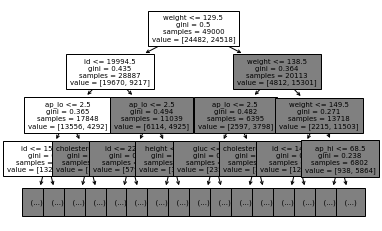

In [189]:
#setting up the classifier to GINI and calculating the GINI and classifying it 
classifier1 = tree.DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=7,min_samples_leaf=5)
classifier1 = classifier1.fit(x_train,y_train)#Training the model with the test values which we had splitted 
print("Classifier1: \n", classifier1)#Printing the classifier 

test_prediction_1 = classifier1.predict(x_test)#WE are predicting the model which we have trained with the test value 
test_actual=y_test#This is the output which we should get outof the classifier 

print("Accuracy of the Classifier: %.2f" %(100*accuracy_score(test_actual, test_prediction_1)),"%")#Calculating the accuracy with the predicted output with actual value 

#Calculating the confusion matrix with the predicted 
confusion_matrix_1 = confusion_matrix(test_actual, test_prediction_1)
print("Confusion Matrix: \n", confusion_matrix_1)

#Calculating the Classification report for the GINI calaculation 
print("\nClassification report:\n",classification_report(test_actual, test_prediction_1))

#The tree plot for GINI calculation 
tree.plot_tree(classifier1,feature_names=list(df_data.columns[0:12]),fontsize=7, max_depth=3)
print(tree.export_graphviz(classifier1))
#Citation: https://dataaspirant.com/decision-tree-algorithm-python-with-scikit-learn/

# Entropy Calculation

Classifier2: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')
Accuracy of the Classifier: 72.91 %
Confusion Matrix: 
 [[8309 2230]
 [3459 7002]]

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.74     10539
           1       0.76      0.67      0.71     10461

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

digraph Tree {
node [shape=box] ;
0 [label="X[4] <= 129.5\nentropy = 1.0\nsamples = 49000\nvalue = [24482, 24518]"] ;
1 [lab

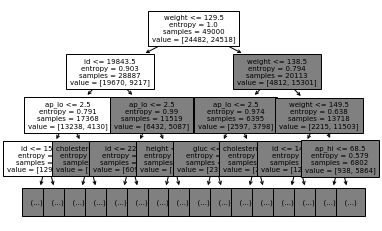

In [190]:
#setting up the classifier to entropy and calculating the entropy and classifying it 
classifier2 = tree.DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=5,min_samples_leaf=5)
classifier2 = classifier2.fit(x_train,y_train)#Training the model with the test values which we had splitted 
print("Classifier2: \n", classifier2)#Printing the classifier 
test_prediction_2 = classifier2.predict(x_test)#WE are predicting the model which we have trained with the test value 

test_actual=y_test#This is the output which we should get outof the classifier 

print("Accuracy of the Classifier: %.2f" %(100*accuracy_score(test_actual, test_prediction_2)),"%")#Calculating the accuracy with the predicted output with actual value 

#Calculating the confusion matrix with the predicted 
confusion_matrix_2 = confusion_matrix(test_actual, test_prediction_2)
print("Confusion Matrix: \n", confusion_matrix_2)

#Calculating the Classification report for the entropy calaculation 
print("\nClassification report:\n",classification_report(test_actual, test_prediction_2))

#The tree plot for Entropy calculation 
tree.plot_tree(classifier2,feature_names=list(df_data.columns[0:12]),fontsize=7, max_depth=3)
print(tree.export_graphviz(classifier2))
#Citation: https://dataaspirant.com/decision-tree-algorithm-python-with-scikit-learn/
#Citation: https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

# Naive Bayes 

In [191]:
#setting up the classifier to GaussianNB
classifier3 = GaussianNB()
#Preprocessing the data inorder to get a much higer accuracy 
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)

#Training the model with the test values which we had splitted 
classifier3 = classifier3.fit(x_train_scaled,y_train)
#We are predicting the model which we have trained with the test value 
test_prediction_3 = classifier3.predict(x_test)
#Calculating the accuracy with the predicted output with actual value 
print("Accuracy of the Classifier: %.2f" %(100*accuracy_score(test_actual, test_prediction_3)),"%")

#Calculating the confusion matrix with the predicted 
confusion_matrix_3 = confusion_matrix(test_actual, test_prediction_3)
print("Confusion Matrix: \n", confusion_matrix_3)

#Calculating the Classification report for the entropy calaculation 
print("\nClassification report:\n",classification_report(test_actual, test_prediction_3))

Accuracy of the Classifier: 51.12 %
Confusion Matrix: 
 [[10498    41]
 [10224   237]]

Classification report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67     10539
           1       0.85      0.02      0.04     10461

    accuracy                           0.51     21000
   macro avg       0.68      0.51      0.36     21000
weighted avg       0.68      0.51      0.36     21000

